In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
from dotenv import load_dotenv
import os

warnings.filterwarnings('ignore')

load_dotenv()

True

In [19]:
def fetch_data(symbol):
    data = yf.download(symbol, start='2010-01-01', end='2023-01-01')
    data = data['Close']
    return data

In [24]:
# Fetch data for a given stock
stock_data = fetch_data('AAPL')

# Check for missing values
stock_missing = stock_data.isnull().sum()

# Create a DataFrame for missing values information
missing_info = pd.DataFrame({
    'Missing Values': [stock_missing]
}, index=['4. close'])

# Display the missing values information
missing_info

# Drop missing values in stock data
stock_data.dropna(inplace=True)

# Display the first few rows of the stock data as a table
stock_data.head().to_frame()

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [25]:
# Calculate the Bollinger Bands
window = 20
stock_data = pd.DataFrame(stock_data)
stock_data['SMA'] = stock_data['Close'].rolling(window=window).mean()
stock_data['STD'] = stock_data['Close'].rolling(window=window).std()
stock_data['Upper Band'] = stock_data['SMA'] + (stock_data['STD'] * 2)
stock_data['Lower Band'] = stock_data['SMA'] - (stock_data['STD'] * 2)

# Check for NaN values
nan_info = pd.DataFrame({
    'NaN values in SMA': [stock_data['SMA'].isnull().sum()],
    'NaN values in STD': [stock_data['STD'].isnull().sum()],
    'NaN values in Upper Band': [stock_data['Upper Band'].isnull().sum()],
    'NaN values in Lower Band': [stock_data['Lower Band'].isnull().sum()]
})

# Display NaN values information
nan_info

,NaN values in SMA,NaN values in STD,NaN values in Upper Band,NaN values in Lower Band
0,19,19,19,19


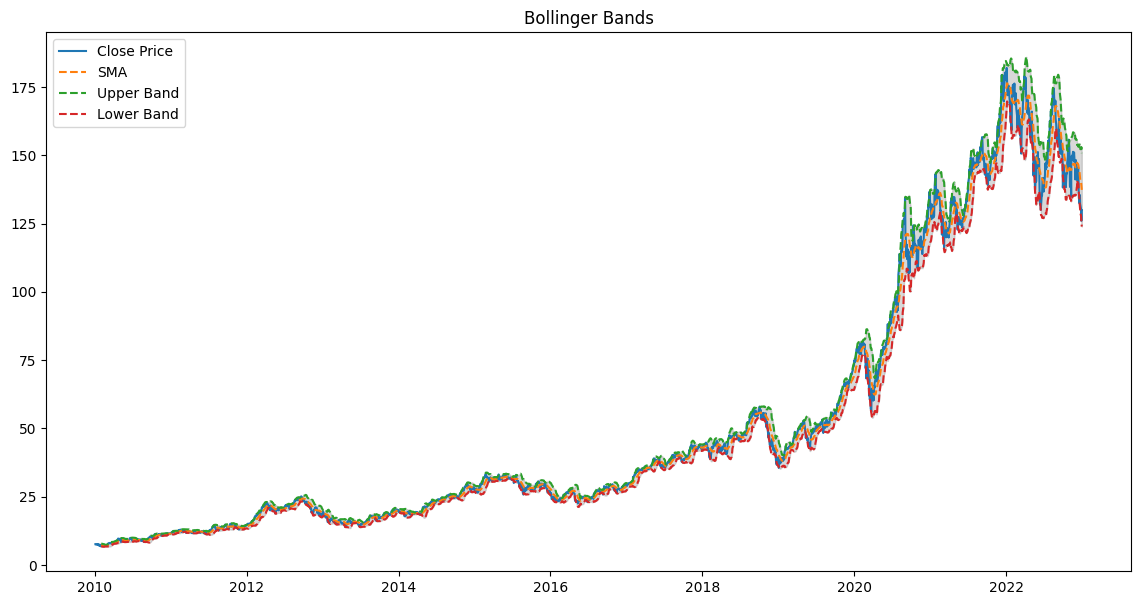

In [26]:
# Plot the Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['SMA'], label='SMA', linestyle='--')
plt.plot(stock_data['Upper Band'], label='Upper Band', linestyle='--')
plt.plot(stock_data['Lower Band'], label='Lower Band', linestyle='--')
plt.fill_between(stock_data.index, stock_data['Lower Band'], stock_data['Upper Band'], color='grey', alpha=0.3)
plt.legend()
plt.title('Bollinger Bands')
plt.show()

In [27]:
# Generate Trading Signals
stock_data['Signal'] = 0
stock_data.loc[stock_data['Close'] < stock_data['Lower Band'], 'Signal'] = 1  # Buy
stock_data.loc[stock_data['Close'] > stock_data['Upper Band'], 'Signal'] = -1  # Sell

# Display rows with non-NaN values for signals
non_nan_data = stock_data.dropna(subset=['Upper Band', 'Lower Band'])
signal_info = non_nan_data[['SMA', 'Upper Band', 'Lower Band', 'Signal']].head(30)

# Display the first few rows with signals as a table
signal_info

,SMA,Upper Band,Lower Band,Signal
Date,,,,
2010-02-01,7.395214,7.862088,6.928341,0
2010-02-02,7.362804,7.846870,6.878737,0
2010-02-03,7.335750,7.811121,6.860378,0
2010-02-04,7.301964,7.812561,6.791368,0
2010-02-05,7.274964,7.793898,6.756031,0
2010-02-08,7.243071,7.763873,6.722270,0
2010-02-09,7.218214,7.734025,6.702403,0
2010-02-10,7.195714,7.713979,6.677449,0
2010-02-11,7.174321,7.670519,6.678124,0


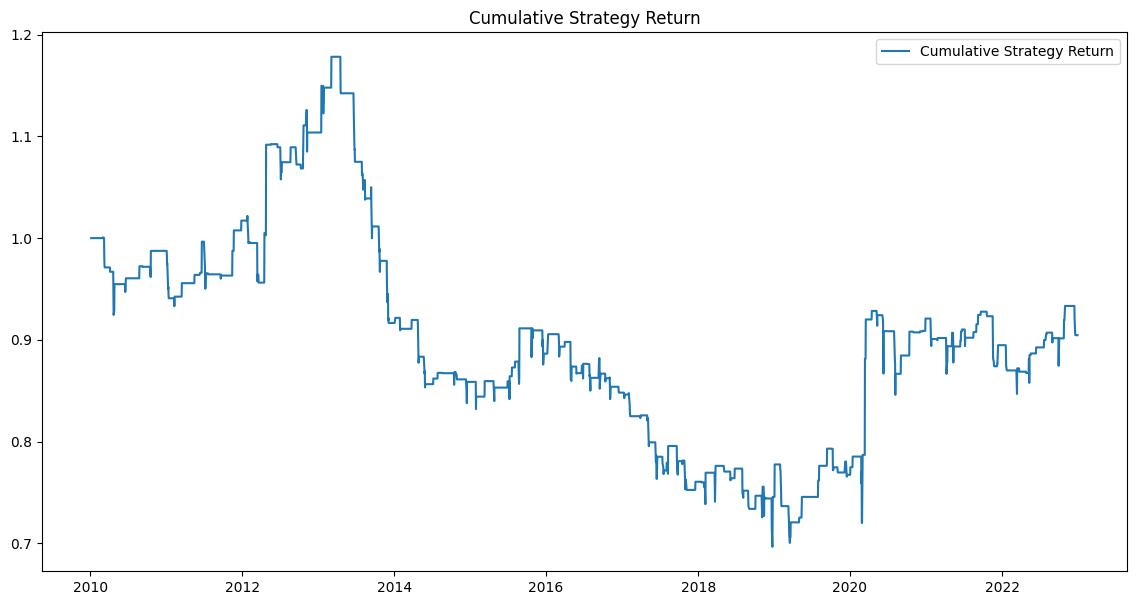

In [28]:
# Calculate Returns and Plot Cumulative Returns
# Calculate daily returns
stock_data['Return'] = stock_data['Close'].pct_change()

# Calculate strategy returns
stock_data['Strategy_Return'] = stock_data['Signal'].shift(1) * stock_data['Return']

# Plot cumulative returns
stock_data['Cumulative_Strategy_Return'] = (1 + stock_data['Strategy_Return']).cumprod()
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Cumulative_Strategy_Return'], label='Cumulative Strategy Return')
plt.legend()
plt.title('Cumulative Strategy Return')
plt.show()

## Reflection and Lessons Learned

Implemented a Bollinger Band trading strategy using the following tech stack:

### Tech Stack
- **Python**: The programming language used for implementation.
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations.
- **Matplotlib**: For data visualization.
- **yfinance**: To fetch historical stock data.

### Steps Taken
1. **Environment Setup**: Set up the environment by importing necessary libraries and loading API keys securely using the `dotenv` package.
2. **Data Fetching**: Fetched historical daily close prices for a stock using the `yfinance` API.
3. **Bollinger Bands Calculation**: Calculated the 20-day simple moving average (SMA) and the upper and lower bands using the standard deviation.
4. **Trading Signals Generation**: Generated trading signals based on the stock price crossing the upper and lower bands.
5. **Strategy Backtesting**: Calculated daily returns, computed the strategy returns based on the generated signals, and plotted the cumulative returns.

### Key Learnings
- **Data Handling**: Efficient data handling and manipulation using Pandas is crucial for any quantitative finance project.
- **API Usage**: Leveraging APIs like `yfinance` for fetching financial data can simplify data acquisition processes.
- **Strategy Implementation**: Implementing trading strategies involves a clear understanding of financial metrics and signals.
- **Backtesting**: Backtesting helps evaluate the effectiveness of trading strategies over historical data, providing insights into potential performance.